In [39]:
%pip install kaggle
%pip install kagglehub

import kagglehub

# Download latest version
path = kagglehub.dataset_download("jaderz/hospital-beds-management")

print("Path to dataset files:", path)



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


100%|█████████████████████████████████████████████████████████████████████████████| 46.5k/46.5k [00:00<00:00, 1.90MB/s]

Extracting files...
Path to dataset files: C:\Users\mrcch\.cache\kagglehub\datasets\jaderz\hospital-beds-management\versions\1


In [40]:
%pip install xgboost
%pip install lightgbm 

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Styling
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
COLORS = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E']

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve, 
                             auc, accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score)

# Statistical Analysis
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr

print("✅ All libraries imported successfully!")
print(f"📦 Pandas version: {pd.__version__}")
print(f"📦 NumPy version: {np.__version__}")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
✅ All libraries imported successfully!
📦 Pandas version: 2.1.1
📦 NumPy version: 1.25.2


In [60]:
import os


csv_files = [f for f in os.listdir(path) if f.lower().endswith('.csv')]
if not csv_files:
    raise FileNotFoundError("❌ No CSV files found in the specified directory!")

csv_path = os.path.join(path, csv_files[0])

df = pd.read_csv(csv_path)


# Display basic information
print("="*70)
print(csv_files[0], " DATASET")
print("="*70)

print(f"🧾 Shape: {df.shape[0]:,} rows × {df.shape[1]:,} columns")
print(f"🧩 Columns: {', '.join(df.columns)}")
print("\n📋 Data Types:")
print(df.dtypes)
print("="*70)

# First look at the data
df.head(10)

patients.csv  DATASET
🧾 Shape: 1,000 rows × 7 columns
🧩 Columns: patient_id, name, age, arrival_date, departure_date, service, satisfaction

📋 Data Types:
patient_id        object
name              object
age                int64
arrival_date      object
departure_date    object
service           object
satisfaction       int64
dtype: object


,patient_id,name,age,arrival_date,departure_date,service,satisfaction
0,PAT-09484753,Richard Rodriguez,24,2025-03-16,2025-03-22,surgery,61
1,PAT-f0644084,Shannon Walker,6,2025-12-13,2025-12-14,surgery,83
2,PAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,general_medicine,83
3,PAT-3dda2bb5,Crystal Johnson,32,2025-10-12,2025-10-23,emergency,81
4,PAT-08591375,Garrett Lin,25,2025-02-18,2025-02-25,ICU,76
5,PAT-f4b29bae,Diana May,83,2025-06-26,2025-06-30,emergency,81
6,PAT-283cda07,William Herrera,62,2025-12-26,2025-12-27,emergency,66
7,PAT-5b61868c,Ashley Waller,0,2025-05-21,2025-06-04,ICU,82
8,PAT-f9c8afa6,Victor Baker,50,2025-07-30,2025-08-13,general_medicine,91
9,PAT-5290be70,Jeffrey Chandler,29,2025-11-01,2025-11-14,emergency,88


In [67]:
print(" Basic Info")
print("="*50)
df.info()
print("="*50)

print("\n Quick Statistics")
display(df.describe(include='all').transpose())
print("="*50)

missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
print("\n Missing values by column:\n")
display(missing.to_frame("Missing Count"))
print("="*50)

df.info()
df.describe(include='all').transpose().head(10)
df.head(5)

 Basic Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   patient_id      1000 non-null   object
 1   name            1000 non-null   object
 2   age             1000 non-null   int64 
 3   arrival_date    1000 non-null   object
 4   departure_date  1000 non-null   object
 5   service         1000 non-null   object
 6   satisfaction    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB

 Quick Statistics


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
patient_id,1000,1000,PAT-09484753,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,1000,993,Samantha Robertson,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1000.0,NaN,NaN,NaN,45.337,25.999912,0.0,23.0,46.0,68.0,89.0
arrival_date,1000,344,2025-01-19,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
departure_date,1000,337,2025-09-28,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
service,1000,4,emergency,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
satisfaction,1000.0,NaN,NaN,NaN,79.597,11.550325,60.0,70.0,80.0,89.25,99.0



 Missing values by column:



,Missing Count


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   patient_id      1000 non-null   object
 1   name            1000 non-null   object
 2   age             1000 non-null   int64 
 3   arrival_date    1000 non-null   object
 4   departure_date  1000 non-null   object
 5   service         1000 non-null   object
 6   satisfaction    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


,patient_id,name,age,arrival_date,departure_date,service,satisfaction
0,PAT-09484753,Richard Rodriguez,24,2025-03-16,2025-03-22,surgery,61
1,PAT-f0644084,Shannon Walker,6,2025-12-13,2025-12-14,surgery,83
2,PAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,general_medicine,83
3,PAT-3dda2bb5,Crystal Johnson,32,2025-10-12,2025-10-23,emergency,81
4,PAT-08591375,Garrett Lin,25,2025-02-18,2025-02-25,ICU,76


In [68]:
import pandas as pd

df_clean = df.copy()

df_clean['arrival_date'] = pd.to_datetime(df_clean['arrival_date'])
df_clean['departure_date'] = pd.to_datetime(df_clean['departure_date'])

df_clean['stay_length'] = (df_clean['departure_date'] - df_clean['arrival_date']).dt.days

df_clean = df_clean.drop(columns=['patient_id', 'name'])

print("Cleaned Data Preview: ")
display(df_clean.head())

print("Data Types after cleaning:")
print(df_clean.dtypes)

Cleaned Data Preview: 


,age,arrival_date,departure_date,service,satisfaction,stay_length
0,24,2025-03-16,2025-03-22,surgery,61,6
1,6,2025-12-13,2025-12-14,surgery,83,1
2,24,2025-06-29,2025-07-05,general_medicine,83,6
3,32,2025-10-12,2025-10-23,emergency,81,11
4,25,2025-02-18,2025-02-25,ICU,76,7


Data Types after cleaning:
age                        int64
arrival_date      datetime64[ns]
departure_date    datetime64[ns]
service                   object
satisfaction               int64
stay_length                int64
dtype: object


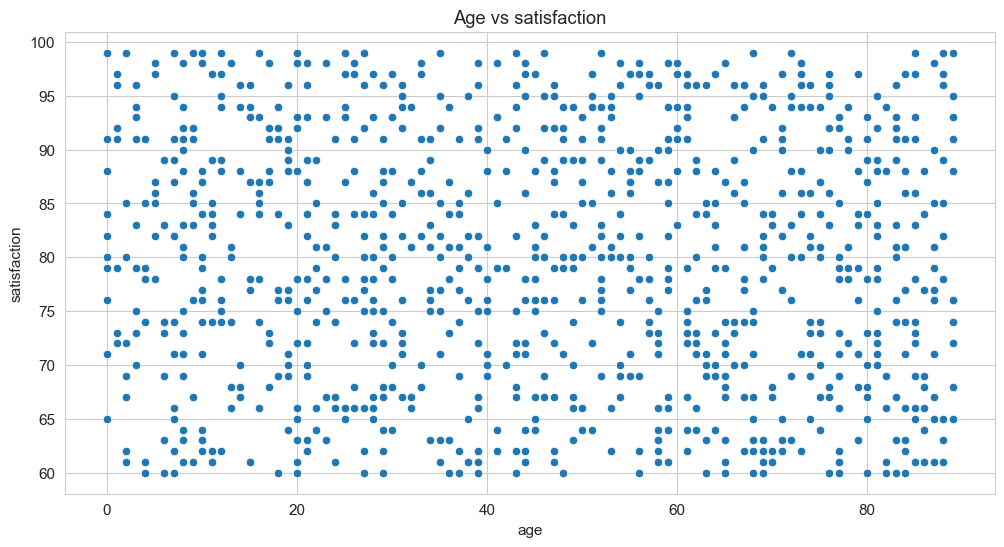

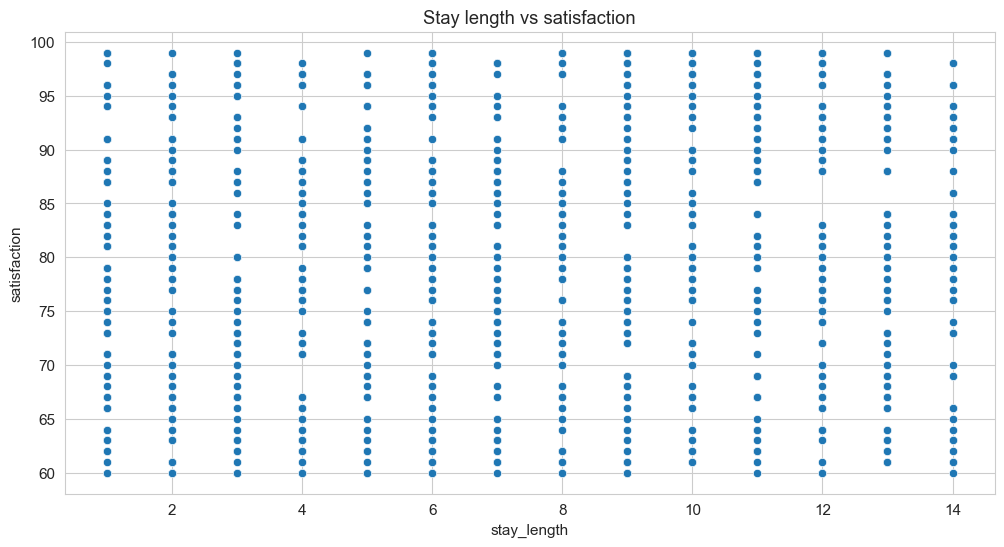

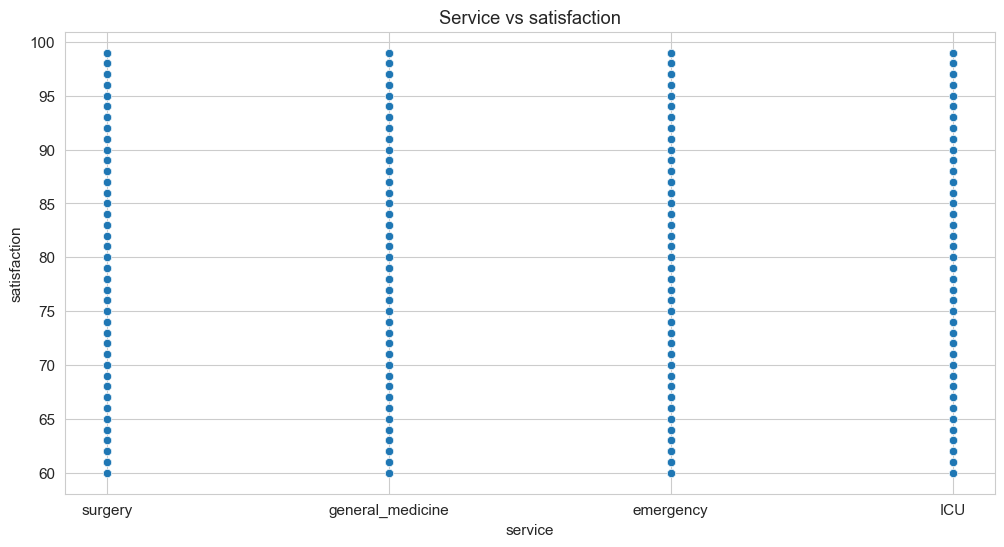

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='age', y='satisfaction', data=df_clean)
plt.title("Age vs satisfaction")
plt.show()

sns.scatterplot(x='stay_length', y="satisfaction", data=df_clean)
plt.title("Stay length vs satisfaction")
plt.show()

sns.scatterplot(x='service', y="satisfaction", data=df_clean)
plt.title("Service vs satisfaction")
plt.show()

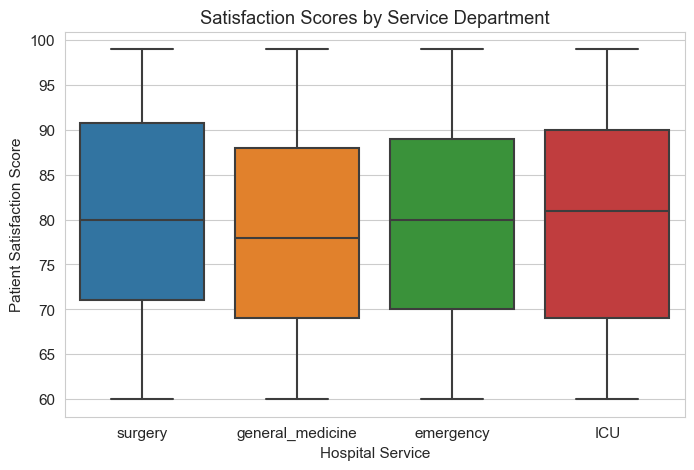

In [74]:
plt.figure(figsize=(8,5))
sns.boxplot(x='service', y='satisfaction', data=df_clean)
plt.title("Satisfaction Scores by Service Department")
plt.xlabel("Hospital Service")
plt.ylabel("Patient Satisfaction Score")
plt.show()

In [75]:
from scipy.stats import f_oneway

groups = [df_clean[df_clean['service'] == s]['satisfaction'] for s in df_clean['service'].unique()]
stat, p_value = f_oneway(*groups)
print(f"F-statistic: {stat:.3f}, p-value: {p_value:.4f}")

F-statistic: 1.024, p-value: 0.3810


In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Turns test service column into its own binary column
df_model = pd.get_dummies(df_clean, columns=['service'], drop_first=True)

X = df_model.drop(columns=['satisfaction'])
y = df_model['satisfaction']

X = X.drop(columns=['arrival_date', 'departure_date'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

print(X.columns.tolist())

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R2 score: {r2:.3f}")
print(f"Mean absolute error: {mae: .2f}")


Training set shape: (800, 5)
Testing set shape: (200, 5)
['age', 'stay_length', 'service_emergency', 'service_general_medicine', 'service_surgery']
R2 score: 0.012
Mean absolute error:  10.35


In [84]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)

                    Feature  Coefficient
1               stay_length     0.183426
0                       age    -0.016072
4           service_surgery    -0.177216
2         service_emergency    -1.149189
3  service_general_medicine    -1.178293
